In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv("data/New_Data.csv")
df["log_USD_kWh"] = np.log(df["USD_kWh"])
print(df)

    Year  USD_kWh     Li    Ni    Co  Other_Materials  log_USD_kWh
0   2019      171  13.68  6.84  6.84            29.07     5.141664
1   2020      143  10.01  7.15  4.29            27.17     4.962845
2   2021      134  10.72  6.70  4.02            30.82     4.897840
3   2022      155  29.45  9.30  6.20            31.00     5.043425
4   2023      151  40.77  9.06  4.53            24.16     5.017280
5   2024      122  26.84  7.32  2.44            21.96     4.804021
6   2025       99  12.87  5.94  1.98            20.79     4.595120
7   2026       87  11.31  6.09  1.74            23.49     4.465908
8   2027       82  12.30  5.74  1.64            25.42     4.406719
9   2028       77  12.32  6.16  1.54            25.41     4.343805
10  2029       75  12.75  6.00  1.50            26.25     4.317488
11  2030       69  12.42  5.52  1.38            26.22     4.234107


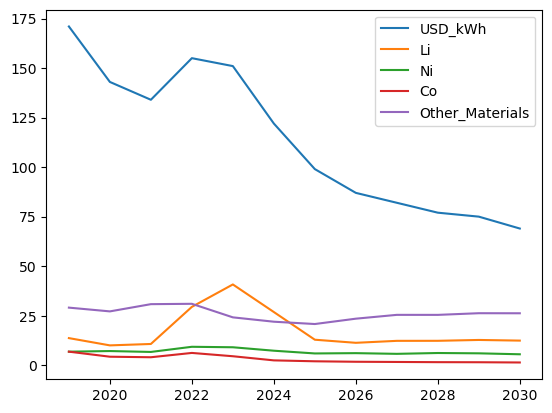

In [3]:
plt.plot(df["Year"], df["USD_kWh"], label = "USD_kWh")
plt.plot(df["Year"], df["Li"], label = "Li")
plt.plot(df["Year"], df["Ni"], label = "Ni")
plt.plot(df["Year"], df["Co"], label = "Co")
plt.plot(df["Year"], df["Other_Materials"], label = "Other_Materials")
plt.legend()
plt.show()

In [4]:
model1 = smf.ols("log_USD_kWh ~ Li + Ni + Co + Other_Materials + Year", data = df)
results = model1.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_USD_kWh   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     467.8
Date:                Sun, 16 Feb 2025   Prob (F-statistic):           1.10e-07
Time:                        18:10:27   Log-Likelihood:                 32.737
No. Observations:                  12   AIC:                            -53.47
Df Residuals:                       6   BIC:                            -50.57
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         143.5043     10.692     

/Users/dipalshah/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  res = hypotest_fun_out(*samples, **kwds)


In [5]:
material_models = {}
material_model_results = {}
for material in ["Li", "Ni", "Co", "Other_Materials"]:
    df[f"log_{material}"] = np.log(df[material])
    material_models[material] = smf.ols(f"log_{material} ~ Year", data = df)
    material_model_results[material] = material_models[material].fit()
    #print(f"{material}:", material_model_results[material].summary())

In [6]:
forecasted = pd.DataFrame({"Year": np.arange(2031, 2051)})
for material in ["Li", "Ni", "Co", "Other_Materials"]:
    forecasted[material] = np.exp(material_model_results[material].predict(forecasted["Year"]))

In [7]:
forecasted["log_USD_kWh"] = results.predict(forecasted)
forecasted["USD_kWh"] = np.exp(forecasted["log_USD_kWh"])

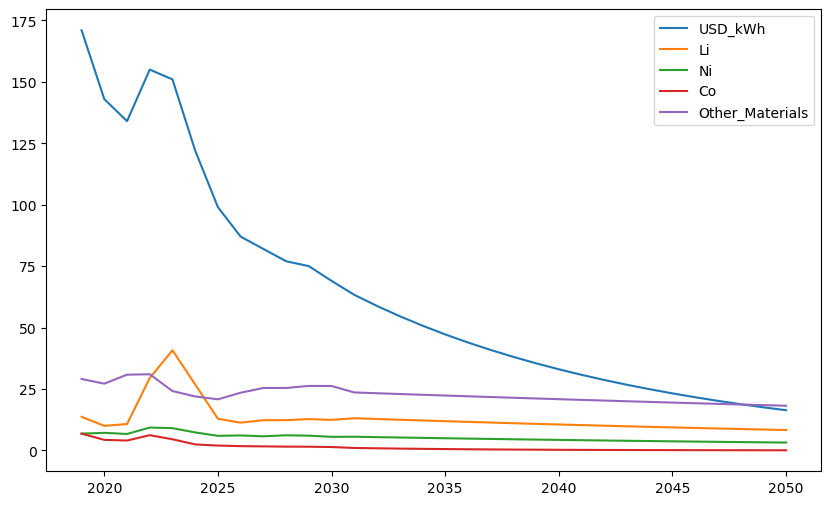

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(df["Year"].tolist() + forecasted["Year"].tolist(), df["USD_kWh"].tolist() + forecasted["USD_kWh"].tolist(), label = "USD_kWh")
plt.plot(df["Year"].tolist() + forecasted["Year"].tolist(), df["Li"].tolist() + forecasted["Li"].tolist(), label = "Li")
plt.plot(df["Year"].tolist() + forecasted["Year"].tolist(), df["Ni"].tolist() + forecasted["Ni"].tolist(), label = "Ni")
plt.plot(df["Year"].tolist() + forecasted["Year"].tolist(), df["Co"].tolist() + forecasted["Co"].tolist(), label = "Co")
plt.plot(df["Year"].tolist() + forecasted["Year"].tolist(), df["Other_Materials"].tolist() + forecasted["Other_Materials"].tolist(), label = "Other_Materials")
plt.legend()
plt.show()

2025-02-16 18:10:27.710574: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-16 18:10:54.669706: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/200
9/9 [==============================] - 2s 3ms/step - loss: 0.1900
Epoch 2/200
9/9 [==============================] - 0s 3ms/step - loss: 0.1734
Epoch 3/200
9/9 [==============================] - 0s 3ms/step - loss: 0.1511
Epoch 4/200
9/9 [==============================] - 0s 3ms/step - loss: 0.1296
Epoch 5/200
9/9 [==============================] - 0s 3ms/step - loss: 0.1108
Epoch 6/200
9/9 [==============================] - 0s 3ms/step - loss: 0.0977
Epoch 7/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0855
Epoch 8/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0786
Epoch 9/200
9/9 [==============================] - 0s 3ms/step - loss: 0.0730
Epoch 10/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0700
Epoch 11/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0675
Epoch 12/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0637
Epoch 13/200
9/9 [==============================] - 0s 2ms/st

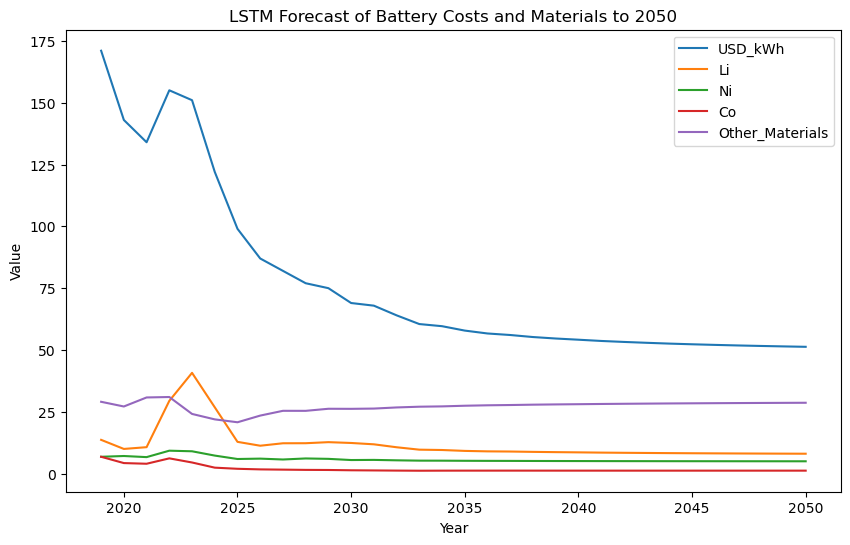

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("data/New_Data.csv")

# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.iloc[:, 1:])  # Exclude 'Year'

# Prepare LSTM input (using past 3 years to predict next year)
X, y = [], []
seq_length = 3
for i in range(len(scaled_data) - seq_length):
    X.append(scaled_data[i:i + seq_length])
    y.append(scaled_data[i + seq_length])

X, y = np.array(X), np.array(y)

# Define LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, X.shape[2])),
    LSTM(50, activation='relu'),
    Dense(X.shape[2])  # Predict all features
])
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=200, batch_size=1, verbose=1)

# Forecast to 2050
future_years = np.arange(2031, 2051)
future_predictions = []

# Start with last known data
last_sequence = scaled_data[-seq_length:]

for _ in range(len(future_years)):
    pred = model.predict(last_sequence.reshape(1, seq_length, X.shape[2]))[0]
    future_predictions.append(pred)
    
    # Update sequence for next prediction
    last_sequence = np.vstack((last_sequence[1:], pred))

# Transform predictions back to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions))

# Create forecast DataFrame
future_df = pd.DataFrame(future_predictions, columns=df.columns[1:])
future_df.insert(0, "Year", future_years)

# Combine historical + forecasted data
full_df = pd.concat([df, future_df], ignore_index=True)

# Plot results
plt.figure(figsize=(10, 6))
for col in df.columns[1:]:
    plt.plot(full_df["Year"], full_df[col], label=col)

plt.xlabel("Year")
plt.ylabel("Value")
plt.title("LSTM Forecast of Battery Costs and Materials to 2050")
plt.legend()
plt.show()
